In [6]:
import pandas as pd
data = pd.read_csv('../Data/Co2/CarbonEmissionDaily/daily-co2-per-contry-2019-2021.csv')
data.head(13)

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.108768,1546272000
1,China,01/01/2019,Power,14.251000,1546272000
2,EU27 & UK,01/01/2019,Power,1.882070,1546272000
3,France,01/01/2019,Power,0.053858,1546272000
4,Germany,01/01/2019,Power,0.378323,1546272000
5,India,01/01/2019,Power,3.349630,1546272000
6,Italy,01/01/2019,Power,0.160676,1546272000
7,Japan,01/01/2019,Power,1.295800,1546272000
8,ROW,01/01/2019,Power,9.171060,1546272000
9,Russia,01/01/2019,Power,2.404910,1546272000


Find distinct contries

In [26]:
areas = data.country.unique()
countries = areas[:13]
print(areas)
print(countries)

['Brazil' 'China' 'EU27 & UK' 'France' 'Germany' 'India' 'Italy' 'Japan'
 'ROW' 'Russia' 'Spain' 'UK' 'US' 'WORLD']
['Brazil' 'China' 'EU27 & UK' 'France' 'Germany' 'India' 'Italy' 'Japan'
 'ROW' 'Russia' 'Spain' 'UK' 'US']


Find distinct sectors

In [ ]:
print(data.sector.unique())


['Power' 'Industry' 'Ground Transport' 'Residential' 'Domestic Aviation'
 'International Aviation']


Calculate the mean of Carbon Emission of Ground Transportaion per conuntry before and after March 1, 2020 (as the covid situaion becomes worse and worse)

In [ ]:
# convert date to Date object
data['date'] = pd.to_datetime(data['date'])

In [ ]:
for area in areas:
    values_before = data[(data['country'] == area) & (
        data['date'] < "2020-03-01") & (data['sector'] == "Ground Transport")]['value']
    values_after = data[(data['country'] == area) & (
        data['date'] >= "2020-03-01") & (data['sector'] == "Ground Transport")]['value']
    print('{}: {}, {}'.format(area,
                                  round(values_after.mean() -
                                        values_before.mean(), 4),
                                  round(values_after.median() -
                                        values_before.median(), 4)))


Brazil: -0.0426, -0.0353
China: -0.0208, -0.0423
EU27 & UK: -0.0642, -0.0652
France: -0.0124, -0.0073
Germany: -0.0025, 0.0046
India: -0.1002, -0.0306
Italy: -0.0123, -0.0108
Japan: -0.0211, -0.0111
ROW: -0.5393, -0.3417
Russia: -0.0126, -0.0005
Spain: -0.0096, -0.0197
UK: -0.0127, -0.0149
US: -0.2568, -0.1999
WORLD: -1.0576, -0.66


In [ ]:
# How about residential?
for area in areas:
    values_before = data[(data['country'] == area) & (
        data['date'] < "2020-03-01") & (data['sector'] == "Residential")]['value']
    values_after = data[(data['country'] == area) & (
        data['date'] >= "2020-03-01") & (data['sector'] == "Residential")]['value']
    print('{}: {}, {}'.format(area, 
        round(values_after.mean() - values_before.mean(), 4),
        round(values_after.median() - values_before.median(), 4)))


Brazil: -0.0003, 0.0
China: -0.1756, -0.1491
EU27 & UK: -0.081, -0.2791
France: -0.0131, -0.023
Germany: -0.0157, -0.058
India: -0.0967, -0.019
Italy: -0.0152, -0.0348
Japan: -0.0313, -0.0423
ROW: -0.2336, -0.305
Russia: -0.0297, -0.0519
Spain: -0.0051, -0.0115
UK: -0.0119, -0.0262
US: -0.2867, -0.315
WORLD: -0.9349, -1.1178


In [ ]:
# How about all sectors?
for area in areas:
    values_before = data[(data['country'] == area) & (
        data['date'] < "2020-03-01")]['value']
    values_after = data[(data['country'] == area) & (
        data['date'] >= "2020-03-01")]['value']
    
    print('{}: {}, {}'.format(area, 
        round(values_after.mean() - values_before.mean(), 4),
        round(values_after.median() - values_before.median(), 4)))


Brazil: -0.0006, 0.0
China: 0.3008, -0.0906
EU27 & UK: -0.12, -0.1375
France: -0.0132, -0.0028
Germany: -0.0197, -0.0269
India: -0.0581, -0.2153
Italy: -0.0126, -0.0129
Japan: -0.0363, -0.0438
ROW: -0.4574, -0.6084
Russia: -0.0115, -0.0408
Spain: -0.0156, -0.0196
UK: -0.0188, -0.0142
US: -0.1771, -0.1543
WORLD: -0.5604, -1.4971


Some Graphs that I think might be interested to display the mean/median

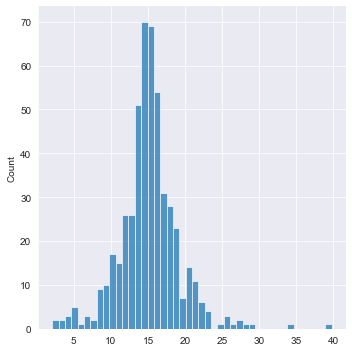

In [ ]:
import seaborn as sns
import numpy as np

In [27]:
mean_data = {"Country": countries, "mean": []}
for country in countries:
    values_before = data[(data['country'] == country) & (
        data['date'] < "2020-03-01")]['value']
    mean_data["mean"].append(round(values_before.mean(), 2))

mean_df = pd.DataFrame(mean_data)
mean_df


,Country,mean
0,Brazil,0.20
1,China,4.88
2,EU27 & UK,1.43
3,France,0.14
4,Germany,0.30
5,India,1.10
6,Italy,0.15
7,Japan,0.49
8,ROW,4.73
9,Russia,0.71


<AxesSubplot:xlabel='Country'>

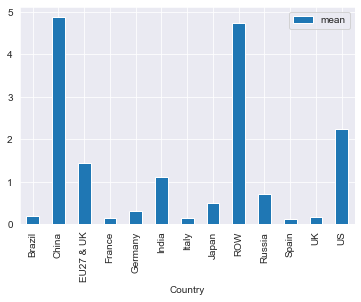

In [28]:
mean_df.plot(x='Country', y='mean', kind='bar')
